<p style = "font-size : 50px; color :#A52A2A ; font-family : 'Comic Sans MS'; text-align : center; background-color :#008B8B; border-radius: 5px 5px;"><strong>Heart Disease Classification</strong></p>


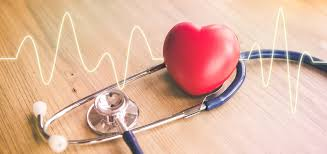 




  <a id = '1.0'></a>
<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>Data Description :-</strong></p>

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>age - age in years</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>sex - (1 = male; 0 = female)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>cp - chest pain type</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>trestbps - resting blood pressure (in mm Hg on admission to the hospital)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>chol - serum cholestoral in mg/dl</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>restecg - resting electrocardiographic results</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>thalach - maximum heart rate achieved</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>exang - exercise induced angina (1 = yes; 0 = no)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>oldpeak - ST depression induced by exercise relative to rest</strong></li>
     <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>slope - the slope of the peak exercise ST segment</strong></li>
     <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>ca - number of major vessels (0-3) colored by flourosopy</strong></li>
     <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>thal - 3 = normal; 6 = fixed defect; 7 = reversable defect</strong></li>
     <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>target - have disease or not (1=yes, 0=no)</strong></li>
</ul>


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [ ]:
#import dataset
heart_df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')       
heart_df.head(10)

In [ ]:
# information about the dataset
heart_df.info()     

In [ ]:
#description about dataset
heart_df.describe()

In [ ]:
heart_df.shape

Checking null values.

In [ ]:
heart_df.isnull().sum()

In [ ]:
heart_df.notnull().sum()

In [ ]:
heart_df.dtypes

**Exploratory Data Analysis(EDA)**

In [ ]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
  if plotnumber<14:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(heart_df[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Values',fontsize=20)
  plotnumber+=1
plt.show()

In [ ]:
#Correlation matrix

plt.figure(figsize = (16, 8))

corr = heart_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [ ]:
#checking the variance
heart_df.var()

We can see ,there is a huge variance.So,we should normalise it.

 **Normalisation**

In [ ]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

In [ ]:
heart_df.isnull().sum()

In [ ]:
x=heart_df.drop('target',axis=1)    
y=heart_df['target']

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)


**1.Logistic Regression**

In [ ]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['Logistic Regression']=acc*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")



In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))

**2.KNearestNeighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred)
accuracies['KNeighborsClassifier']=acc1*100

accuracy_score(y_train,knn.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")







In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))


**3.SVC**

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVC']=acc2*100

accuracy_score(y_train,svc.predict(x_train))

print("Accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")







In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))

**4.DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
accuracies['DecisionTreeClassifier']=acc3*100

accuracy_score(y_train,dtc.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")






In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
y_pred4 = dtc.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
accuracies['DecisionTreeClassifier']=acc4*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")



In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred4))

print("Classification Report",classification_report(y_test,y_pred4))

**5.RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)


acc5=accuracy_score(y_test,y_pred5)
accuracies['RandomForestClassifier']=acc5*100


accuracy_score(y_train,rfc.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")





In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))


**Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train, y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6=accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc5*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")



In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred6))

print("Classification Report",classification_report(y_test,y_pred6))

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 6, n_estimators = 10)
xgb.fit(x_train, y_train)

y_pred7 = xgb.predict(x_test)

acc7=accuracy_score(y_test,y_pred7)
accuracies['XGBClassifier']=acc6*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred7)*100,"%")

print("Confusion matrix of the model",confusion_matrix(y_test,y_pred7))

print("Classification Report",classification_report(y_test,y_pred7))

In [ ]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()